In [1]:
import torch
import torchvision
import numpy as np

from torch.utils.data.dataset import Subset

In [2]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
ds_train10 = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]));
print(ds_train10)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.1307,), std=(0.3081,))
                         )
    Target Transforms (if any): None


In [4]:
print(len(ds_train10))

60000


In [5]:
ln = len(ds_train10);
train_y = np.zeros(ln);
for idx, (data, target) in enumerate(ds_train10):
    train_y[idx] = target.numpy()

idx = np.where(train_y <= 8)[0]
ds_train9 = Subset(ds_train10, idx)
print(len(ds_train9))

54051


In [6]:
idx = np.where(train_y <= 7)[0]
ds_train8 = Subset(ds_train10, idx)
print(len(ds_train8))

48200


In [7]:
ds_test10 = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

In [8]:
print(len(ds_test10))

10000


In [9]:
ln = len(ds_test10);
test_y = np.zeros(ln);
for idx, (data, target) in enumerate(ds_test10):
    test_y[idx] = target.numpy()

idx = np.where(test_y <= 8)[0]
ds_test9 = Subset(ds_test10, idx)
print(len(ds_test9))

8991


In [10]:
idx = np.where(test_y <= 7)[0]
ds_test8 = Subset(ds_test10, idx)
print(len(ds_test8))

8017


In [11]:
train_loader10 = torch.utils.data.DataLoader(
    ds_train10,
  batch_size=batch_size_train, shuffle=True)

test_loader10 = torch.utils.data.DataLoader(
    ds_test10,
  batch_size=batch_size_test, shuffle=True)

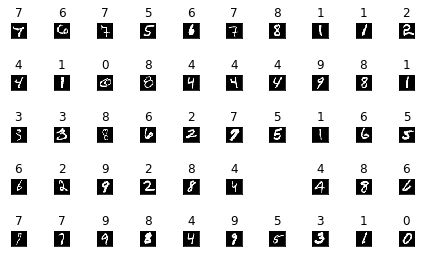

In [12]:
examples = enumerate(test_loader10)
batch_idx, (example_data, example_targets) = next(examples)

example_data.shape

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [13]:
train_loader8 = torch.utils.data.DataLoader(
    ds_train8,
  batch_size=batch_size_train, shuffle=True)

test_loader8 = torch.utils.data.DataLoader(
    ds_test8,
  batch_size=batch_size_test, shuffle=True)

torch.Size([1000, 1, 28, 28])


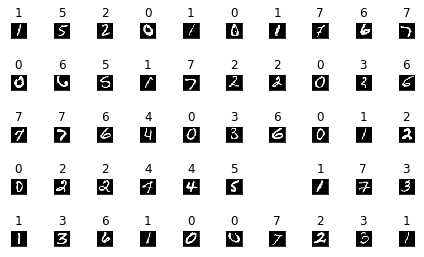

In [14]:
examples = enumerate(test_loader8)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

example_data.shape

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [15]:
idx = np.where(train_y <= 4)[0]
ds_train5 = Subset(ds_train10, idx)
print(len(ds_train5))

30596


In [16]:
idx = np.where(test_y <= 4)[0]
ds_test5 = Subset(ds_test10, idx)
print(len(ds_test5))

5139


In [17]:
train_loader5 = torch.utils.data.DataLoader(
    ds_train5,
  batch_size=batch_size_train, shuffle=True)

test_loader5 = torch.utils.data.DataLoader(
    ds_test5,
  batch_size=batch_size_test, shuffle=True)

In [18]:
idx = np.where(train_y <= 1)[0]
ds_train2 = Subset(ds_train10, idx)
print(len(ds_train2))

12665


In [19]:
idx = np.where(test_y <= 1)[0]
ds_test2 = Subset(ds_test10, idx)
print(len(ds_test2))

2115


In [20]:
train_loader2 = torch.utils.data.DataLoader(
    ds_train2,
  batch_size=batch_size_train, shuffle=True)

test_loader2 = torch.utils.data.DataLoader(
    ds_test2,
  batch_size=batch_size_test, shuffle=True)

# Train network using 0-9

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [23]:
def train(network, train_loader, epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.cuda()
        target = target.cuda()            
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './results/model.pth')
            torch.save(optimizer.state_dict(), './results/optimizer.pth')
    return network

In [24]:
def test(network, test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.cuda()
            target = target.cuda()            
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [25]:
net1 = Net().cuda()
optimizer = optim.SGD(net1.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader10.dataset) for i in range(n_epochs + 1)]

In [26]:
test(net1, test_loader10)
for epoch in range(1, n_epochs + 1):
    train(net1, train_loader10, epoch)
    test(net1, test_loader10)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3111, Accuracy: 956/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296428
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.275135
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.290798
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.282064
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.258089
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.213377
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.210812
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.159625
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.076725
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.050290
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.919861
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.947154
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.758680
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.462732
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.574901
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.556828
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.358212
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.291479
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.280410
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.278168
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.439769
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.217291
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.258742
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.265625
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.213628
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.313699
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.251113
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.186378
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.455516
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.274573
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.302203
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.222525
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.245448
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.493234
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.495537
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.373417
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.215059
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.200566
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.423534


Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.380068
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.149398
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.274498
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.291689
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.339421
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.226408
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.271932
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.328961
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.332856
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.337463
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.212005
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.345667
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.058675
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.305580
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.159506
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.321072
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.261939
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.378035
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.208678
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.431637


Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.465941
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.252868
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.120264
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.134791
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.137490
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.254618
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.502740
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.134832
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.412872
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.099467
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.129690
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.062403
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.307494
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.153802
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.324872
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.196463
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.264732
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.133931
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.470937
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.344596


Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.205250
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.074272

Test set: Avg. loss: 0.0593, Accuracy: 9816/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.195859
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.183627
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.131834
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.069188
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.254059
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.077695
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.283479
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.224602
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.148367
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.232872
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.252813
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.219346
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.188102
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.243118
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.243987
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.075515
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.217166
Train Epoch: 8 [10880

Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.127651
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.119514
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.280890
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.174676
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.312178
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.087110
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.134723
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.242130
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.133048
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.094104
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.305479
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.239999
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.050261
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.062300
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.149544
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.219416
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.134464
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.140804
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.276580
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.130013


In [27]:
b = 2000;
noise = torch.rand(b, 1, 28, 28)
print(noise)

tensor([[[[1.1654e-01, 9.7179e-01, 4.9124e-01,  ..., 4.2477e-01,
           2.2299e-01, 8.4291e-01],
          [5.2902e-01, 4.3635e-01, 3.6457e-02,  ..., 6.9386e-02,
           5.2910e-01, 6.2618e-02],
          [9.0178e-01, 7.3611e-01, 5.5311e-01,  ..., 4.3923e-01,
           4.2466e-01, 6.6996e-01],
          ...,
          [2.8626e-01, 5.7789e-02, 9.9723e-02,  ..., 9.8694e-01,
           9.0332e-01, 9.1501e-01],
          [8.4994e-01, 1.1725e-01, 1.6346e-01,  ..., 8.2650e-01,
           5.3172e-01, 6.6479e-03],
          [9.0715e-02, 6.3028e-01, 4.6070e-02,  ..., 4.0643e-03,
           1.1211e-01, 6.7317e-01]]],


        [[[2.6023e-02, 2.7601e-01, 5.1060e-03,  ..., 9.9962e-01,
           6.8794e-01, 5.2147e-01],
          [4.0335e-01, 6.0134e-01, 9.2850e-01,  ..., 8.4041e-02,
           1.7467e-01, 3.5758e-01],
          [6.8115e-01, 3.9177e-01, 7.9013e-01,  ..., 6.9970e-01,
           6.1563e-01, 8.6991e-01],
          ...,
          [9.1025e-01, 5.5306e-01, 3.7287e-02,  ..., 8.52

In [28]:
output = net1(noise.cuda())

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [29]:
ll = net1.last
print(ll.shape)

torch.Size([2000, 50])


In [30]:
from lid import LID
ll = ll.cpu().detach().numpy() 
lid_net1_c10 = LID(ll, ll, k=50)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00389483, 0.00778965, 0.01168448, 0.00778965, 0.02336896,
        0.01557931, 0.01947414, 0.02336896, 0.02726379, 0.04673793,
        0.07400172, 0.05063275, 0.07010689, 0.12463447, 0.0856862 ,
        0.14021378, 0.14021378, 0.14021378, 0.13631895, 0.18695171,
        0.2142155 , 0.20253102, 0.26095342, 0.24147929, 0.24147929,
        0.29600687, 0.28821722, 0.31548101, 0.23758446, 0.23368963,
        0.2142155 , 0.22979481, 0.23758446, 0.22979481, 0.24147929,
        0.2142155 , 0.18305688, 0.1713724 , 0.18695171, 0.18695171,
        0.1285293 , 0.18305688, 0.10905516, 0.12073964, 0.16358274,
        0.09347585, 0.13631895, 0.10905516, 0.07010689, 0.06621206,
        0.07789654, 0.05063275, 0.07010689, 0.04673793, 0.04673793,
        0.06231724, 0.03115862, 0.03894827, 0.03115862, 0.02336896,
        0.01947414, 0.01168448, 0.01557931, 0.01168448, 0.01557931,
        0.00389483, 0.00389483, 0.01168448, 0.00778965, 0.00778965,
        0.00389483, 0.00778965, 0.00389483, 0.00

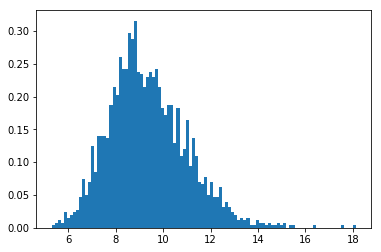

In [31]:
plt.hist(lid_net1_c10, bins=100, normed=True)

# Net2 similar to net, but last layer dim=100, instead of 50

In [32]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [33]:
net2 = Net2().cuda()
n_epochs = 10
optimizer = optim.SGD(net2.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader10.dataset) for i in range(n_epochs + 1)]

In [34]:
test(net2, test_loader10)
for epoch in range(1, n_epochs + 1):
    train(net2, train_loader10, epoch)
    test(net2, test_loader10)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3074, Accuracy: 1114/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288522
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.310102
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.290101
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.284409
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.290248
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.298102
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.282577
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.248449
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.245279
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.243803
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.204534
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.181953
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.168794
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.102715
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.055047
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.916580
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.738268
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.468500
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.407731
Train Epoch: 1 [12160

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.266035
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.185744
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.290547
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.134534
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.217128
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.278396
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.333344
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.431278
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.349911
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.414125
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.141687
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.490166
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.198963
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.294182
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.166205
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.180784
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.164786
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.362507
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.146096
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.353935


Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.185238
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.215423
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.212814
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.171681
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.141145
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.223571
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.242784
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.164667
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.154460
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.121669
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.105415
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.346812
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.083585
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.210093
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.315057
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.188002
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.228438
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.259277
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.108278
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.251671


Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.062279
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.130699
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.156980
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.072087
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.415923
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.124832
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.155165
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.079360
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.099484
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.182737
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.079778
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.218099
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.089105
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.347106
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.331802
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.161071
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.161372
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.083050
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.171177
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.170312


Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.355349
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.142604

Test set: Avg. loss: 0.0548, Accuracy: 9816/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.180897
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.145571
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.110002
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.200543
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.070035
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.122384
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.130428
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.116895
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.261097
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.044600
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.322890
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.134576
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.183788
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.143282
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.251352
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.147351
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.169182
Train Epoch: 8 [10880

Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.202216
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.132746
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.026898
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.169453
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.062813
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.172081
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.061824
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.076804
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.079331
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.210631
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.272324
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.082527
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.134004
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.303418
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.263496
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.276479
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.217985
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.075055
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.149603
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.197337


torch.Size([2000, 100])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00338078, 0.        , 0.00338078, 0.        , 0.00338078,
        0.02028468, 0.00676156, 0.01352312, 0.0169039 , 0.0169039 ,
        0.0338078 , 0.02366546, 0.05071171, 0.05071171, 0.05747327,
        0.05071171, 0.08451951, 0.08113873, 0.11156575, 0.07437717,
        0.14537356, 0.138612  , 0.1724198 , 0.16227746, 0.12508887,
        0.1893237 , 0.17918136, 0.18594292, 0.21636995, 0.14537356,
        0.20960838, 0.20284682, 0.18594292, 0.16227746, 0.19270448,
        0.16903902, 0.1724198 , 0.16227746, 0.1893237 , 0.20960838,
        0.12846966, 0.16565824, 0.19946604, 0.11494653, 0.13523122,
        0.12170809, 0.138612  , 0.10480419, 0.07775795, 0.09128107,
        0.10818497, 0.08113873, 0.10818497, 0.08790029, 0.07775795,
        0.07099639, 0.04733093, 0.06085405, 0.05409249, 0.03718858,
        0.03718858, 0.04395015, 0.05409249, 0.03718858, 0.04395015,
        0.02366546, 0.04395015, 0.02028468, 0.02704624, 0.02366546,
        0.02028468, 0.02028468, 0.02028468, 0.01

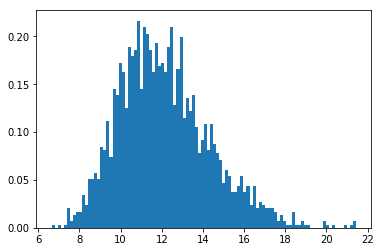

In [35]:
output = net2(noise.cuda())
ll = net2.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net2_c10 = LID(ll, ll, k=50)
plt.hist(lid_net2_c10, bins=100, normed=True)

# Try 8 classes

In [36]:
class Net_c8(nn.Module):
    def __init__(self):
        super(Net_c8, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 8)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [37]:
net_c8 = Net_c8().cuda()
n_epochs = 10
optimizer = optim.SGD(net_c8.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader8.dataset) for i in range(n_epochs + 1)]

test(net_c8, test_loader8)
for epoch in range(1, n_epochs + 1):
    train(net_c8, train_loader8, epoch)
    test(net_c8, test_loader8)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.0851, Accuracy: 953/8017 (11%)

Train Epoch: 1 [0/48200 (0%)]	Loss: 2.080665
Train Epoch: 1 [640/48200 (1%)]	Loss: 2.077751
Train Epoch: 1 [1280/48200 (3%)]	Loss: 2.054353
Train Epoch: 1 [1920/48200 (4%)]	Loss: 2.033965
Train Epoch: 1 [2560/48200 (5%)]	Loss: 1.990703
Train Epoch: 1 [3200/48200 (7%)]	Loss: 1.951077
Train Epoch: 1 [3840/48200 (8%)]	Loss: 1.842593
Train Epoch: 1 [4480/48200 (9%)]	Loss: 1.821124
Train Epoch: 1 [5120/48200 (11%)]	Loss: 1.542811
Train Epoch: 1 [5760/48200 (12%)]	Loss: 1.499018
Train Epoch: 1 [6400/48200 (13%)]	Loss: 1.317794
Train Epoch: 1 [7040/48200 (15%)]	Loss: 1.324623
Train Epoch: 1 [7680/48200 (16%)]	Loss: 1.246471
Train Epoch: 1 [8320/48200 (17%)]	Loss: 0.994980
Train Epoch: 1 [8960/48200 (19%)]	Loss: 0.791617
Train Epoch: 1 [9600/48200 (20%)]	Loss: 0.807380
Train Epoch: 1 [10240/48200 (21%)]	Loss: 0.614277
Train Epoch: 1 [10880/48200 (23%)]	Loss: 0.647308
Train Epoch: 1 [11520/48200 (24%)]	Loss: 0.749157
Train Epoch: 1 [12160/

Train Epoch: 3 [7680/48200 (16%)]	Loss: 0.238202
Train Epoch: 3 [8320/48200 (17%)]	Loss: 0.204273
Train Epoch: 3 [8960/48200 (19%)]	Loss: 0.112339
Train Epoch: 3 [9600/48200 (20%)]	Loss: 0.372577
Train Epoch: 3 [10240/48200 (21%)]	Loss: 0.226432
Train Epoch: 3 [10880/48200 (23%)]	Loss: 0.115228
Train Epoch: 3 [11520/48200 (24%)]	Loss: 0.150101
Train Epoch: 3 [12160/48200 (25%)]	Loss: 0.263199
Train Epoch: 3 [12800/48200 (27%)]	Loss: 0.168046
Train Epoch: 3 [13440/48200 (28%)]	Loss: 0.157311
Train Epoch: 3 [14080/48200 (29%)]	Loss: 0.290823
Train Epoch: 3 [14720/48200 (31%)]	Loss: 0.270473
Train Epoch: 3 [15360/48200 (32%)]	Loss: 0.340872
Train Epoch: 3 [16000/48200 (33%)]	Loss: 0.186803
Train Epoch: 3 [16640/48200 (34%)]	Loss: 0.129556
Train Epoch: 3 [17280/48200 (36%)]	Loss: 0.213797
Train Epoch: 3 [17920/48200 (37%)]	Loss: 0.264308
Train Epoch: 3 [18560/48200 (38%)]	Loss: 0.169477
Train Epoch: 3 [19200/48200 (40%)]	Loss: 0.143088
Train Epoch: 3 [19840/48200 (41%)]	Loss: 0.320433
Trai

Train Epoch: 5 [15360/48200 (32%)]	Loss: 0.130724
Train Epoch: 5 [16000/48200 (33%)]	Loss: 0.279688
Train Epoch: 5 [16640/48200 (34%)]	Loss: 0.179391
Train Epoch: 5 [17280/48200 (36%)]	Loss: 0.171943
Train Epoch: 5 [17920/48200 (37%)]	Loss: 0.193679
Train Epoch: 5 [18560/48200 (38%)]	Loss: 0.211494
Train Epoch: 5 [19200/48200 (40%)]	Loss: 0.176691
Train Epoch: 5 [19840/48200 (41%)]	Loss: 0.144760
Train Epoch: 5 [20480/48200 (42%)]	Loss: 0.235052
Train Epoch: 5 [21120/48200 (44%)]	Loss: 0.251301
Train Epoch: 5 [21760/48200 (45%)]	Loss: 0.065417
Train Epoch: 5 [22400/48200 (46%)]	Loss: 0.150386
Train Epoch: 5 [23040/48200 (48%)]	Loss: 0.189008
Train Epoch: 5 [23680/48200 (49%)]	Loss: 0.109398
Train Epoch: 5 [24320/48200 (50%)]	Loss: 0.247290
Train Epoch: 5 [24960/48200 (52%)]	Loss: 0.209570
Train Epoch: 5 [25600/48200 (53%)]	Loss: 0.096663
Train Epoch: 5 [26240/48200 (54%)]	Loss: 0.224310
Train Epoch: 5 [26880/48200 (56%)]	Loss: 0.101614
Train Epoch: 5 [27520/48200 (57%)]	Loss: 0.118140


Train Epoch: 7 [23040/48200 (48%)]	Loss: 0.189784
Train Epoch: 7 [23680/48200 (49%)]	Loss: 0.285413
Train Epoch: 7 [24320/48200 (50%)]	Loss: 0.151739
Train Epoch: 7 [24960/48200 (52%)]	Loss: 0.093503
Train Epoch: 7 [25600/48200 (53%)]	Loss: 0.283423
Train Epoch: 7 [26240/48200 (54%)]	Loss: 0.151320
Train Epoch: 7 [26880/48200 (56%)]	Loss: 0.104477
Train Epoch: 7 [27520/48200 (57%)]	Loss: 0.118996
Train Epoch: 7 [28160/48200 (58%)]	Loss: 0.216587
Train Epoch: 7 [28800/48200 (60%)]	Loss: 0.110020
Train Epoch: 7 [29440/48200 (61%)]	Loss: 0.096755
Train Epoch: 7 [30080/48200 (62%)]	Loss: 0.170507
Train Epoch: 7 [30720/48200 (64%)]	Loss: 0.098796
Train Epoch: 7 [31360/48200 (65%)]	Loss: 0.112937
Train Epoch: 7 [32000/48200 (66%)]	Loss: 0.211110
Train Epoch: 7 [32640/48200 (68%)]	Loss: 0.178929
Train Epoch: 7 [33280/48200 (69%)]	Loss: 0.415125
Train Epoch: 7 [33920/48200 (70%)]	Loss: 0.129206
Train Epoch: 7 [34560/48200 (72%)]	Loss: 0.113458
Train Epoch: 7 [35200/48200 (73%)]	Loss: 0.105352


Train Epoch: 9 [30720/48200 (64%)]	Loss: 0.111690
Train Epoch: 9 [31360/48200 (65%)]	Loss: 0.044955
Train Epoch: 9 [32000/48200 (66%)]	Loss: 0.263454
Train Epoch: 9 [32640/48200 (68%)]	Loss: 0.073768
Train Epoch: 9 [33280/48200 (69%)]	Loss: 0.128747
Train Epoch: 9 [33920/48200 (70%)]	Loss: 0.089640
Train Epoch: 9 [34560/48200 (72%)]	Loss: 0.579141
Train Epoch: 9 [35200/48200 (73%)]	Loss: 0.162319
Train Epoch: 9 [35840/48200 (74%)]	Loss: 0.213115
Train Epoch: 9 [36480/48200 (76%)]	Loss: 0.061674
Train Epoch: 9 [37120/48200 (77%)]	Loss: 0.081147
Train Epoch: 9 [37760/48200 (78%)]	Loss: 0.044464
Train Epoch: 9 [38400/48200 (80%)]	Loss: 0.104212
Train Epoch: 9 [39040/48200 (81%)]	Loss: 0.129581
Train Epoch: 9 [39680/48200 (82%)]	Loss: 0.106596
Train Epoch: 9 [40320/48200 (84%)]	Loss: 0.047931
Train Epoch: 9 [40960/48200 (85%)]	Loss: 0.074869
Train Epoch: 9 [41600/48200 (86%)]	Loss: 0.035494
Train Epoch: 9 [42240/48200 (88%)]	Loss: 0.052306
Train Epoch: 9 [42880/48200 (89%)]	Loss: 0.124216


torch.Size([2000, 50])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00349753, 0.00349753, 0.        , 0.00349753, 0.0139901 ,
        0.00699505, 0.03147773, 0.02448268, 0.01049258, 0.03847278,
        0.07344804, 0.04197031, 0.08743815, 0.09093567, 0.06645299,
        0.11192083, 0.11541835, 0.06995052, 0.15039361, 0.11541835,
        0.13640351, 0.13640351, 0.18187134, 0.22733918, 0.19236392,
        0.17487629, 0.22733918, 0.18187134, 0.18187134, 0.19236392,
        0.17137877, 0.21334908, 0.25182186, 0.21334908, 0.20635403,
        0.19935897, 0.21334908, 0.16788124, 0.19586145, 0.13290598,
        0.16438372, 0.12940846, 0.15738866, 0.12591093, 0.13640351,
        0.11891588, 0.11541835, 0.09093567, 0.08743815, 0.09093567,
        0.08743815, 0.06295547, 0.08394062, 0.06995052, 0.05246289,
        0.06295547, 0.04546784, 0.03497526, 0.02798021, 0.03147773,
        0.04546784, 0.02448268, 0.02798021, 0.00699505, 0.02798021,
        0.0139901 , 0.01049258, 0.01748763, 0.01748763, 0.0139901 ,
        0.02448268, 0.01049258, 0.01748763, 0.01

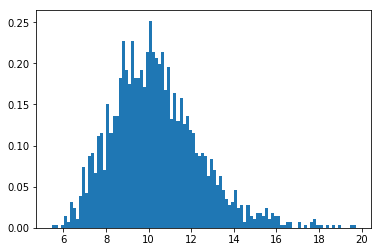

In [38]:
output = net_c8(noise.cuda())
ll = net_c8.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net1_c8 = LID(ll, ll, k=50)
plt.hist(lid_net1_c8, bins=100, normed=True)

In [39]:
class Net2_c8(nn.Module):
    def __init__(self):
        super(Net2_c8, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(100, 8)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [40]:
net2_c8 = Net2_c8().cuda()
n_epochs = 10
optimizer = optim.SGD(net2_c8.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader8.dataset) for i in range(n_epochs + 1)]

test(net2_c8, test_loader8)
for epoch in range(1, n_epochs + 1):
    train(net2_c8, train_loader8, epoch)
    test(net2_c8, test_loader8)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.0767, Accuracy: 1093/8017 (13%)

Train Epoch: 1 [0/48200 (0%)]	Loss: 2.124532
Train Epoch: 1 [640/48200 (1%)]	Loss: 2.080121
Train Epoch: 1 [1280/48200 (3%)]	Loss: 2.001012
Train Epoch: 1 [1920/48200 (4%)]	Loss: 2.000285
Train Epoch: 1 [2560/48200 (5%)]	Loss: 1.937588
Train Epoch: 1 [3200/48200 (7%)]	Loss: 1.935493
Train Epoch: 1 [3840/48200 (8%)]	Loss: 1.729519
Train Epoch: 1 [4480/48200 (9%)]	Loss: 1.619585
Train Epoch: 1 [5120/48200 (11%)]	Loss: 1.392503
Train Epoch: 1 [5760/48200 (12%)]	Loss: 1.315869
Train Epoch: 1 [6400/48200 (13%)]	Loss: 1.125140
Train Epoch: 1 [7040/48200 (15%)]	Loss: 1.302177
Train Epoch: 1 [7680/48200 (16%)]	Loss: 0.987594
Train Epoch: 1 [8320/48200 (17%)]	Loss: 0.975525
Train Epoch: 1 [8960/48200 (19%)]	Loss: 0.838939
Train Epoch: 1 [9600/48200 (20%)]	Loss: 0.667607
Train Epoch: 1 [10240/48200 (21%)]	Loss: 0.614115
Train Epoch: 1 [10880/48200 (23%)]	Loss: 0.755726
Train Epoch: 1 [11520/48200 (24%)]	Loss: 0.767577
Train Epoch: 1 [12160

Train Epoch: 3 [6400/48200 (13%)]	Loss: 0.146493
Train Epoch: 3 [7040/48200 (15%)]	Loss: 0.307869
Train Epoch: 3 [7680/48200 (16%)]	Loss: 0.094759
Train Epoch: 3 [8320/48200 (17%)]	Loss: 0.119808
Train Epoch: 3 [8960/48200 (19%)]	Loss: 0.499658
Train Epoch: 3 [9600/48200 (20%)]	Loss: 0.067145
Train Epoch: 3 [10240/48200 (21%)]	Loss: 0.214824
Train Epoch: 3 [10880/48200 (23%)]	Loss: 0.225647
Train Epoch: 3 [11520/48200 (24%)]	Loss: 0.101158
Train Epoch: 3 [12160/48200 (25%)]	Loss: 0.095540
Train Epoch: 3 [12800/48200 (27%)]	Loss: 0.165291
Train Epoch: 3 [13440/48200 (28%)]	Loss: 0.147344
Train Epoch: 3 [14080/48200 (29%)]	Loss: 0.183161
Train Epoch: 3 [14720/48200 (31%)]	Loss: 0.220958
Train Epoch: 3 [15360/48200 (32%)]	Loss: 0.221444
Train Epoch: 3 [16000/48200 (33%)]	Loss: 0.114379
Train Epoch: 3 [16640/48200 (34%)]	Loss: 0.153379
Train Epoch: 3 [17280/48200 (36%)]	Loss: 0.154812
Train Epoch: 3 [17920/48200 (37%)]	Loss: 0.258330
Train Epoch: 3 [18560/48200 (38%)]	Loss: 0.137543
Train 

Train Epoch: 5 [14080/48200 (29%)]	Loss: 0.085986
Train Epoch: 5 [14720/48200 (31%)]	Loss: 0.091218
Train Epoch: 5 [15360/48200 (32%)]	Loss: 0.259002
Train Epoch: 5 [16000/48200 (33%)]	Loss: 0.095736
Train Epoch: 5 [16640/48200 (34%)]	Loss: 0.118999
Train Epoch: 5 [17280/48200 (36%)]	Loss: 0.290808
Train Epoch: 5 [17920/48200 (37%)]	Loss: 0.075848
Train Epoch: 5 [18560/48200 (38%)]	Loss: 0.084447
Train Epoch: 5 [19200/48200 (40%)]	Loss: 0.181716
Train Epoch: 5 [19840/48200 (41%)]	Loss: 0.174951
Train Epoch: 5 [20480/48200 (42%)]	Loss: 0.129419
Train Epoch: 5 [21120/48200 (44%)]	Loss: 0.119647
Train Epoch: 5 [21760/48200 (45%)]	Loss: 0.116237
Train Epoch: 5 [22400/48200 (46%)]	Loss: 0.203935
Train Epoch: 5 [23040/48200 (48%)]	Loss: 0.073762
Train Epoch: 5 [23680/48200 (49%)]	Loss: 0.112127
Train Epoch: 5 [24320/48200 (50%)]	Loss: 0.150749
Train Epoch: 5 [24960/48200 (52%)]	Loss: 0.226141
Train Epoch: 5 [25600/48200 (53%)]	Loss: 0.275428
Train Epoch: 5 [26240/48200 (54%)]	Loss: 0.086640


Train Epoch: 7 [21760/48200 (45%)]	Loss: 0.197354
Train Epoch: 7 [22400/48200 (46%)]	Loss: 0.047364
Train Epoch: 7 [23040/48200 (48%)]	Loss: 0.032852
Train Epoch: 7 [23680/48200 (49%)]	Loss: 0.137532
Train Epoch: 7 [24320/48200 (50%)]	Loss: 0.207822
Train Epoch: 7 [24960/48200 (52%)]	Loss: 0.027329
Train Epoch: 7 [25600/48200 (53%)]	Loss: 0.139072
Train Epoch: 7 [26240/48200 (54%)]	Loss: 0.066644
Train Epoch: 7 [26880/48200 (56%)]	Loss: 0.038952
Train Epoch: 7 [27520/48200 (57%)]	Loss: 0.109432
Train Epoch: 7 [28160/48200 (58%)]	Loss: 0.093271
Train Epoch: 7 [28800/48200 (60%)]	Loss: 0.045407
Train Epoch: 7 [29440/48200 (61%)]	Loss: 0.084699
Train Epoch: 7 [30080/48200 (62%)]	Loss: 0.141938
Train Epoch: 7 [30720/48200 (64%)]	Loss: 0.083401
Train Epoch: 7 [31360/48200 (65%)]	Loss: 0.030332
Train Epoch: 7 [32000/48200 (66%)]	Loss: 0.080836
Train Epoch: 7 [32640/48200 (68%)]	Loss: 0.016513
Train Epoch: 7 [33280/48200 (69%)]	Loss: 0.037777
Train Epoch: 7 [33920/48200 (70%)]	Loss: 0.081834


Train Epoch: 9 [29440/48200 (61%)]	Loss: 0.189876
Train Epoch: 9 [30080/48200 (62%)]	Loss: 0.132867
Train Epoch: 9 [30720/48200 (64%)]	Loss: 0.058648
Train Epoch: 9 [31360/48200 (65%)]	Loss: 0.236816
Train Epoch: 9 [32000/48200 (66%)]	Loss: 0.030990
Train Epoch: 9 [32640/48200 (68%)]	Loss: 0.032491
Train Epoch: 9 [33280/48200 (69%)]	Loss: 0.190632
Train Epoch: 9 [33920/48200 (70%)]	Loss: 0.072591
Train Epoch: 9 [34560/48200 (72%)]	Loss: 0.203781
Train Epoch: 9 [35200/48200 (73%)]	Loss: 0.035547
Train Epoch: 9 [35840/48200 (74%)]	Loss: 0.032931
Train Epoch: 9 [36480/48200 (76%)]	Loss: 0.233333
Train Epoch: 9 [37120/48200 (77%)]	Loss: 0.085153
Train Epoch: 9 [37760/48200 (78%)]	Loss: 0.030904
Train Epoch: 9 [38400/48200 (80%)]	Loss: 0.034929
Train Epoch: 9 [39040/48200 (81%)]	Loss: 0.096662
Train Epoch: 9 [39680/48200 (82%)]	Loss: 0.164802
Train Epoch: 9 [40320/48200 (84%)]	Loss: 0.099479
Train Epoch: 9 [40960/48200 (85%)]	Loss: 0.063189
Train Epoch: 9 [41600/48200 (86%)]	Loss: 0.013310


torch.Size([2000, 100])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00338522, 0.        , 0.        , 0.00338522, 0.        ,
        0.        , 0.01354088, 0.01015566, 0.01354088, 0.01354088,
        0.02031132, 0.02369655, 0.04400787, 0.03723743, 0.04062265,
        0.06093397, 0.05754875, 0.07786008, 0.09478618, 0.12525317,
        0.12525317, 0.14217927, 0.16587582, 0.11848273, 0.1624906 ,
        0.16587582, 0.16926104, 0.21665413, 0.19634281, 0.1794167 ,
        0.22342457, 0.17603148, 0.1794167 , 0.18957236, 0.18957236,
        0.20988369, 0.18957236, 0.24035068, 0.21326891, 0.1624906 ,
        0.15572016, 0.18618714, 0.1624906 , 0.11848273, 0.13879405,
        0.11509751, 0.10494184, 0.10155662, 0.10155662, 0.14556449,
        0.11848273, 0.11171229, 0.05754875, 0.08463052, 0.07786008,
        0.09478618, 0.05754875, 0.05077831, 0.05416353, 0.04400787,
        0.04062265, 0.03385221, 0.03046699, 0.04062265, 0.02369655,
        0.03046699, 0.02031132, 0.01015566, 0.02708177, 0.01354088,
        0.0169261 , 0.03046699, 0.01354088, 0.01

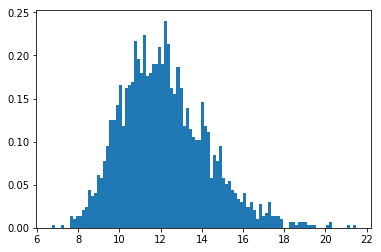

In [41]:
output = net2_c8(noise.cuda())
ll = net2_c8.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net2_c8 = LID(ll, ll, k=50)
plt.hist(lid_net2_c8, bins=100, normed=True)

In [42]:
print(lid_net1_c10.mean())
print(lid_net2_c10.mean())

print(lid_net1_c8.mean())
print(lid_net2_c8.mean())

9.352073653268565
12.127778225896543
10.343094565354395
12.188324013133153


# Train network using 0-4

In [43]:
class Net_c5(nn.Module):
    def __init__(self):
        super(Net_c5, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 5)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [44]:
net_c5 = Net_c5().cuda()
n_epochs = 10
optimizer = optim.SGD(net_c5.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader5.dataset) for i in range(n_epochs + 1)]

test(net_c5, test_loader5)
for epoch in range(1, n_epochs + 1):
    train(net_c5, train_loader5, epoch)
    test(net_c5, test_loader5)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 1.6136, Accuracy: 776/5139 (15%)

Train Epoch: 1 [0/30596 (0%)]	Loss: 1.624736
Train Epoch: 1 [640/30596 (2%)]	Loss: 1.574385
Train Epoch: 1 [1280/30596 (4%)]	Loss: 1.527636
Train Epoch: 1 [1920/30596 (6%)]	Loss: 1.447317
Train Epoch: 1 [2560/30596 (8%)]	Loss: 1.273492
Train Epoch: 1 [3200/30596 (10%)]	Loss: 1.208273
Train Epoch: 1 [3840/30596 (13%)]	Loss: 1.018849
Train Epoch: 1 [4480/30596 (15%)]	Loss: 0.882609
Train Epoch: 1 [5120/30596 (17%)]	Loss: 0.804402
Train Epoch: 1 [5760/30596 (19%)]	Loss: 0.896352
Train Epoch: 1 [6400/30596 (21%)]	Loss: 0.567690
Train Epoch: 1 [7040/30596 (23%)]	Loss: 0.417135
Train Epoch: 1 [7680/30596 (25%)]	Loss: 0.492278
Train Epoch: 1 [8320/30596 (27%)]	Loss: 0.576188
Train Epoch: 1 [8960/30596 (29%)]	Loss: 0.281412
Train Epoch: 1 [9600/30596 (31%)]	Loss: 0.420193
Train Epoch: 1 [10240/30596 (33%)]	Loss: 0.406761
Train Epoch: 1 [10880/30596 (35%)]	Loss: 0.440940
Train Epoch: 1 [11520/30596 (38%)]	Loss: 0.268332
Train Epoch: 1 [121

Train Epoch: 4 [11520/30596 (38%)]	Loss: 0.117020
Train Epoch: 4 [12160/30596 (40%)]	Loss: 0.153038
Train Epoch: 4 [12800/30596 (42%)]	Loss: 0.075280
Train Epoch: 4 [13440/30596 (44%)]	Loss: 0.154982
Train Epoch: 4 [14080/30596 (46%)]	Loss: 0.097636
Train Epoch: 4 [14720/30596 (48%)]	Loss: 0.156357
Train Epoch: 4 [15360/30596 (50%)]	Loss: 0.386735
Train Epoch: 4 [16000/30596 (52%)]	Loss: 0.066318
Train Epoch: 4 [16640/30596 (54%)]	Loss: 0.036759
Train Epoch: 4 [17280/30596 (56%)]	Loss: 0.059006
Train Epoch: 4 [17920/30596 (58%)]	Loss: 0.166732
Train Epoch: 4 [18560/30596 (61%)]	Loss: 0.059458
Train Epoch: 4 [19200/30596 (63%)]	Loss: 0.168574
Train Epoch: 4 [19840/30596 (65%)]	Loss: 0.178940
Train Epoch: 4 [20480/30596 (67%)]	Loss: 0.061106
Train Epoch: 4 [21120/30596 (69%)]	Loss: 0.086548
Train Epoch: 4 [21760/30596 (71%)]	Loss: 0.061440
Train Epoch: 4 [22400/30596 (73%)]	Loss: 0.145853
Train Epoch: 4 [23040/30596 (75%)]	Loss: 0.062898
Train Epoch: 4 [23680/30596 (77%)]	Loss: 0.136555


Train Epoch: 7 [23040/30596 (75%)]	Loss: 0.148550
Train Epoch: 7 [23680/30596 (77%)]	Loss: 0.030178
Train Epoch: 7 [24320/30596 (79%)]	Loss: 0.016463
Train Epoch: 7 [24960/30596 (81%)]	Loss: 0.022412
Train Epoch: 7 [25600/30596 (84%)]	Loss: 0.020551
Train Epoch: 7 [26240/30596 (86%)]	Loss: 0.109369
Train Epoch: 7 [26880/30596 (88%)]	Loss: 0.140623
Train Epoch: 7 [27520/30596 (90%)]	Loss: 0.075738
Train Epoch: 7 [28160/30596 (92%)]	Loss: 0.112684
Train Epoch: 7 [28800/30596 (94%)]	Loss: 0.071483
Train Epoch: 7 [29440/30596 (96%)]	Loss: 0.026024
Train Epoch: 7 [30080/30596 (98%)]	Loss: 0.019757

Test set: Avg. loss: 0.0210, Accuracy: 5100/5139 (99%)

Train Epoch: 8 [0/30596 (0%)]	Loss: 0.099283
Train Epoch: 8 [640/30596 (2%)]	Loss: 0.138834
Train Epoch: 8 [1280/30596 (4%)]	Loss: 0.097541
Train Epoch: 8 [1920/30596 (6%)]	Loss: 0.312480
Train Epoch: 8 [2560/30596 (8%)]	Loss: 0.119726
Train Epoch: 8 [3200/30596 (10%)]	Loss: 0.033646
Train Epoch: 8 [3840/30596 (13%)]	Loss: 0.050083
Train Epo

torch.Size([2000, 50])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00708355, 0.        , 0.        , 0.01062532, 0.01062532,
        0.01062532, 0.01770887, 0.03541774, 0.03895951, 0.04250128,
        0.07083547, 0.05666838, 0.05666838, 0.0672937 , 0.05312661,
        0.10271144, 0.11687853, 0.07437725, 0.11687853, 0.18063046,
        0.16646336, 0.17000514, 0.18771401, 0.19125578, 0.24438239,
        0.2018811 , 0.2018811 , 0.23375706, 0.17354691, 0.23021529,
        0.21958997, 0.21958997, 0.2160482 , 0.23375706, 0.19479755,
        0.21958997, 0.23729884, 0.19479755, 0.11333676, 0.17708868,
        0.18417223, 0.16646336, 0.12396208, 0.12042031, 0.12750385,
        0.11333676, 0.09916966, 0.0814608 , 0.09562789, 0.06021015,
        0.0814608 , 0.06375193, 0.0672937 , 0.05312661, 0.06375193,
        0.04958483, 0.05312661, 0.02479242, 0.02833419, 0.02125064,
        0.03895951, 0.03541774, 0.02125064, 0.02479242, 0.01770887,
        0.02125064, 0.01062532, 0.00708355, 0.01770887, 0.01416709,
        0.01770887, 0.01062532, 0.00708355, 0.01

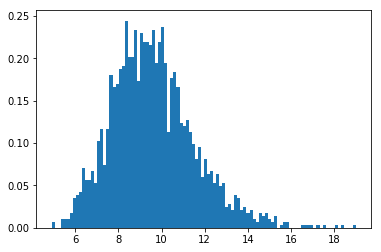

In [45]:
output = net_c5(noise.cuda())
ll = net_c5.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net1_c5 = LID(ll, ll, k=50)
plt.hist(lid_net1_c5, bins=100, normed=True)

In [46]:
print(np.mean(lid_net1_c5))

9.61678358585131


# Train network using 0-1

In [47]:
class Net_c2(nn.Module):
    def __init__(self):
        super(Net_c2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [48]:
net_c2 = Net_c2().cuda()
n_epochs = 30
optimizer = optim.SGD(net_c2.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader2.dataset) for i in range(n_epochs + 1)]

test(net_c2, test_loader2)
for epoch in range(1, n_epochs + 1):
    train(net_c2, train_loader2, epoch)
    test(net_c2, test_loader2)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.6933, Accuracy: 1135/2115 (53%)

Train Epoch: 1 [0/12665 (0%)]	Loss: 0.685686
Train Epoch: 1 [640/12665 (5%)]	Loss: 0.663261
Train Epoch: 1 [1280/12665 (10%)]	Loss: 0.596664
Train Epoch: 1 [1920/12665 (15%)]	Loss: 0.495721
Train Epoch: 1 [2560/12665 (20%)]	Loss: 0.338835
Train Epoch: 1 [3200/12665 (25%)]	Loss: 0.194393
Train Epoch: 1 [3840/12665 (30%)]	Loss: 0.126059
Train Epoch: 1 [4480/12665 (35%)]	Loss: 0.105655
Train Epoch: 1 [5120/12665 (40%)]	Loss: 0.062918
Train Epoch: 1 [5760/12665 (45%)]	Loss: 0.055405
Train Epoch: 1 [6400/12665 (51%)]	Loss: 0.046140
Train Epoch: 1 [7040/12665 (56%)]	Loss: 0.039839
Train Epoch: 1 [7680/12665 (61%)]	Loss: 0.050970
Train Epoch: 1 [8320/12665 (66%)]	Loss: 0.052352
Train Epoch: 1 [8960/12665 (71%)]	Loss: 0.017355
Train Epoch: 1 [9600/12665 (76%)]	Loss: 0.017583
Train Epoch: 1 [10240/12665 (81%)]	Loss: 0.017922
Train Epoch: 1 [10880/12665 (86%)]	Loss: 0.024625
Train Epoch: 1 [11520/12665 (91%)]	Loss: 0.027999
Train Epoch: 1 


Test set: Avg. loss: 0.0027, Accuracy: 2112/2115 (99%)

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.004618
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.004156
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.001954
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.006490
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.000560
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.005093
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.002231
Train Epoch: 9 [4480/12665 (35%)]	Loss: 0.006715
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000738
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000499
Train Epoch: 9 [6400/12665 (51%)]	Loss: 0.000617
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.004566
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.001347
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.002721
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.001050
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.003005
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.008370
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.004661
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.010927
Train Epoch: 9 

Train Epoch: 16 [10240/12665 (81%)]	Loss: 0.000214
Train Epoch: 16 [10880/12665 (86%)]	Loss: 0.000952
Train Epoch: 16 [11520/12665 (91%)]	Loss: 0.002269
Train Epoch: 16 [12160/12665 (96%)]	Loss: 0.001974

Test set: Avg. loss: 0.0024, Accuracy: 2113/2115 (99%)

Train Epoch: 17 [0/12665 (0%)]	Loss: 0.001558
Train Epoch: 17 [640/12665 (5%)]	Loss: 0.000827
Train Epoch: 17 [1280/12665 (10%)]	Loss: 0.000195
Train Epoch: 17 [1920/12665 (15%)]	Loss: 0.000710
Train Epoch: 17 [2560/12665 (20%)]	Loss: 0.002552
Train Epoch: 17 [3200/12665 (25%)]	Loss: 0.000265
Train Epoch: 17 [3840/12665 (30%)]	Loss: 0.000798
Train Epoch: 17 [4480/12665 (35%)]	Loss: 0.000539
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.021029
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.003806
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.004040
Train Epoch: 17 [7040/12665 (56%)]	Loss: 0.000716
Train Epoch: 17 [7680/12665 (61%)]	Loss: 0.000605
Train Epoch: 17 [8320/12665 (66%)]	Loss: 0.003625
Train Epoch: 17 [8960/12665 (71%)]	Loss: 0.00

Train Epoch: 24 [7680/12665 (61%)]	Loss: 0.000039
Train Epoch: 24 [8320/12665 (66%)]	Loss: 0.001427
Train Epoch: 24 [8960/12665 (71%)]	Loss: 0.000429
Train Epoch: 24 [9600/12665 (76%)]	Loss: 0.000083
Train Epoch: 24 [10240/12665 (81%)]	Loss: 0.001090
Train Epoch: 24 [10880/12665 (86%)]	Loss: 0.003407
Train Epoch: 24 [11520/12665 (91%)]	Loss: 0.000250
Train Epoch: 24 [12160/12665 (96%)]	Loss: 0.000063

Test set: Avg. loss: 0.0025, Accuracy: 2114/2115 (99%)

Train Epoch: 25 [0/12665 (0%)]	Loss: 0.000224
Train Epoch: 25 [640/12665 (5%)]	Loss: 0.000426
Train Epoch: 25 [1280/12665 (10%)]	Loss: 0.000334
Train Epoch: 25 [1920/12665 (15%)]	Loss: 0.002926
Train Epoch: 25 [2560/12665 (20%)]	Loss: 0.000579
Train Epoch: 25 [3200/12665 (25%)]	Loss: 0.000208
Train Epoch: 25 [3840/12665 (30%)]	Loss: 0.000199
Train Epoch: 25 [4480/12665 (35%)]	Loss: 0.001616
Train Epoch: 25 [5120/12665 (40%)]	Loss: 0.026375
Train Epoch: 25 [5760/12665 (45%)]	Loss: 0.000629
Train Epoch: 25 [6400/12665 (51%)]	Loss: 0.00

torch.Size([2000, 50])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00863144, 0.        , 0.00215786, 0.00215786, 0.00215786,
        0.00431572, 0.        , 0.00431572, 0.0107893 , 0.        ,
        0.00863144, 0.01510503, 0.0107893 , 0.00647358, 0.00647358,
        0.02373647, 0.01294716, 0.01510503, 0.01942075, 0.02805219,
        0.03021005, 0.03884149, 0.0496308 , 0.0604201 , 0.03884149,
        0.06905155, 0.09494588, 0.07768299, 0.08415657, 0.15320812,
        0.12731379, 0.14673453, 0.12515593, 0.18126031, 0.16615528,
        0.15752384, 0.14241881, 0.18773389, 0.15752384, 0.16183956,
        0.170471  , 0.14457667, 0.12731379, 0.14673453, 0.14457667,
        0.13810309, 0.10357732, 0.12731379, 0.08199871, 0.08631443,
        0.09278801, 0.06257796, 0.0604201 , 0.0496308 , 0.0496308 ,
        0.02589433, 0.03236791, 0.03668363, 0.02805219, 0.03021005,
        0.02157861, 0.02589433, 0.01294716, 0.02373647, 0.00431572,
        0.00647358, 0.0107893 , 0.00647358, 0.        , 0.00647358,
        0.00647358, 0.00215786, 0.00215786, 0.00

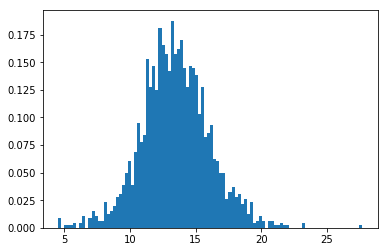

In [49]:
output = net_c2(noise.cuda())
ll = net_c2.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net1_c2 = LID(ll, ll, k=50)
plt.hist(lid_net1_c2, bins=100, normed=True)